In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.datasets.mnist' from '/opt/anaconda3/lib/python3.12/site-packages/keras/datasets/mnist/__init__.py'>

In [3]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

<function matplotlib.pyplot.show(close=None, block=None)>

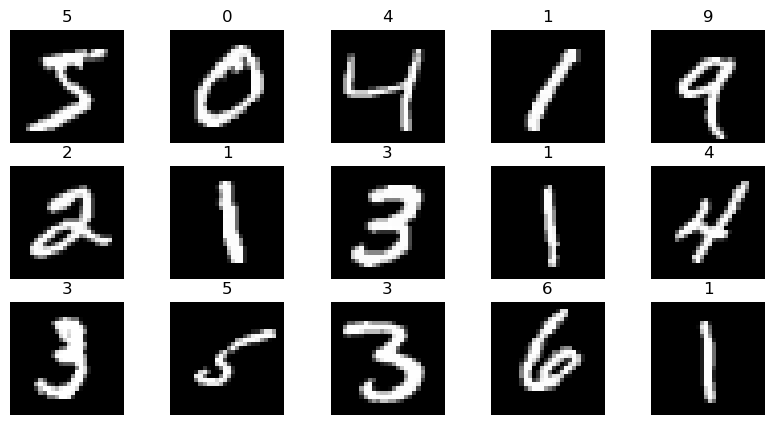

In [8]:
plt.figure(figsize = (10,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train[i], cmap='grey')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.show

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1).astype(float)
X_test = X_test.reshape(-1, 28, 28, 1).astype(float)

In [10]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
model.fit(X_train,y_train, epochs=5,validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8441 - loss: 1.1072 - val_accuracy: 0.9813 - val_loss: 0.0645
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9789 - loss: 0.0702 - val_accuracy: 0.9823 - val_loss: 0.0637
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9851 - loss: 0.0469 - val_accuracy: 0.9860 - val_loss: 0.0491
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9868 - loss: 0.0411 - val_accuracy: 0.9892 - val_loss: 0.0447
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9894 - loss: 0.0347 - val_accuracy: 0.9872 - val_loss: 0.0540


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9822 - loss: 0.0608


In [14]:
print(f"{test_acc: .3f}")

 0.985


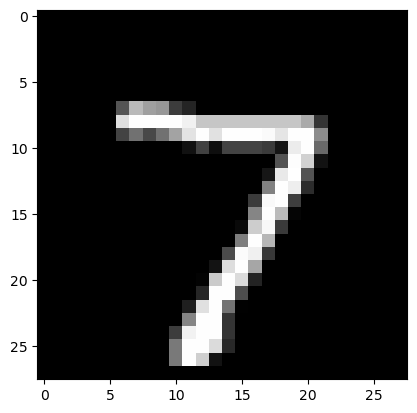

In [15]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [16]:
pred = model.predict(X_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [17]:
print(f"{pred.argmax()}")

7
